**This notebook was provided by PRDL and MLLB professor and it is modified to meet the needs of the project**



In [ ]:
!pip install keras

In [ ]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [ ]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [ ]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [ ]:
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36, 1) 
Test shape= (279, 36, 36, 1)


## Try CNN / ConvNet models in Keras (remember):

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.


## 1.   **Define your ConvNet model**:

## ...a model similar as the one we used in TensorFlow...

In [ ]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()

# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 4 convolution filters of size 5x5 each.
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(36, 36,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


## <font color=yellow> You can try other  ConvNet styles: i.e. VGG style

  
  [ConvNet Arquitectures](https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
  
  **CNNs Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more …**

The ImageNet project is a large visual database designed for use in visual object recognition software research. The ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes

## 2.   **Compile your model**. Specify loss functions and optimizers

In [ ]:
from keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 33,069
Trainable params: 33,069
Non-trainable params: 0
____________________________________________________

# 3.   **Fit your model**. Train the model using data.

In [ ]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 18ms/step - loss: 1.6250 - accuracy: 0.2142 - val_loss: 1.5881 - val_accuracy: 0.2007
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.5490 - accuracy: 0.2922 - val_loss: 1.4813 - val_accuracy: 0.3477
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 1.3981 - accuracy: 0.3899 - val_loss: 1.2249 - val_accuracy: 0.5556
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1587 - accuracy: 0.5170 - val_loss: 1.0205 - val_accuracy: 0.5735
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0042 - accuracy: 0.5710 - val_loss: 0.9393 - val_accuracy: 0.6022
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9078 - accuracy: 0.6040 - val_loss: 0.8533 - val_accuracy: 0.6631
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8582 - accuracy: 0.6093 - val_loss: 0.7751 - val_accuracy: 0.7491
Epoch 8/100


## Note:
* another possibility is just specify  $validation\_split$ = 0.10 ... so that 10% (or the % you indicate) of training data is used for validation



In [ ]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
'''
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_split = 0.10,
         verbose=1)
'''

'\nhistory=model.fit(train, onehot_train,\n         epochs=100,\n         batch_size=128,\n         validation_split = 0.10,\n         verbose=1)\n'

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [ ]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9968

Training Accuracy= 0.9968140125274658
3/3 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.9642

Test Accuracy= 0.9641577005386353


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train Accuracy:  0.96
Test_Accuracy:  0.96


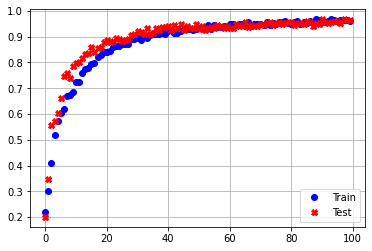

In [ ]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.grid()
plt.legend(['Train','Test'])

# Get predictions / probabilities ...

In [ ]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[1.48019569e-06 8.14056781e-04 6.10045163e-07 7.64188080e-05
  9.99107420e-01]
 [1.66149334e-06 9.99844432e-01 4.78526272e-06 4.81768475e-05
  1.00930585e-04]
 [4.07479134e-10 1.81012165e-05 2.06836631e-10 2.44487510e-05
  9.99957442e-01]
 [6.44423425e-01 7.62704440e-06 3.55568916e-01 8.39547789e-12
  3.95983069e-09]
 [2.21653929e-28 5.31994447e-04 1.46097829e-23 9.99468029e-01
  1.50975428e-08]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[58  0  3  0  0]
 [ 0 71  0  0  0]
 [ 4  0 44  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 56]]


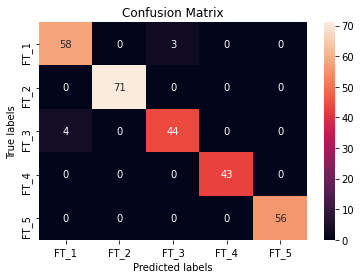

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

[[0. 0. 0. 1. 0.]]
conv2d_input (1, 36, 36, 1) 


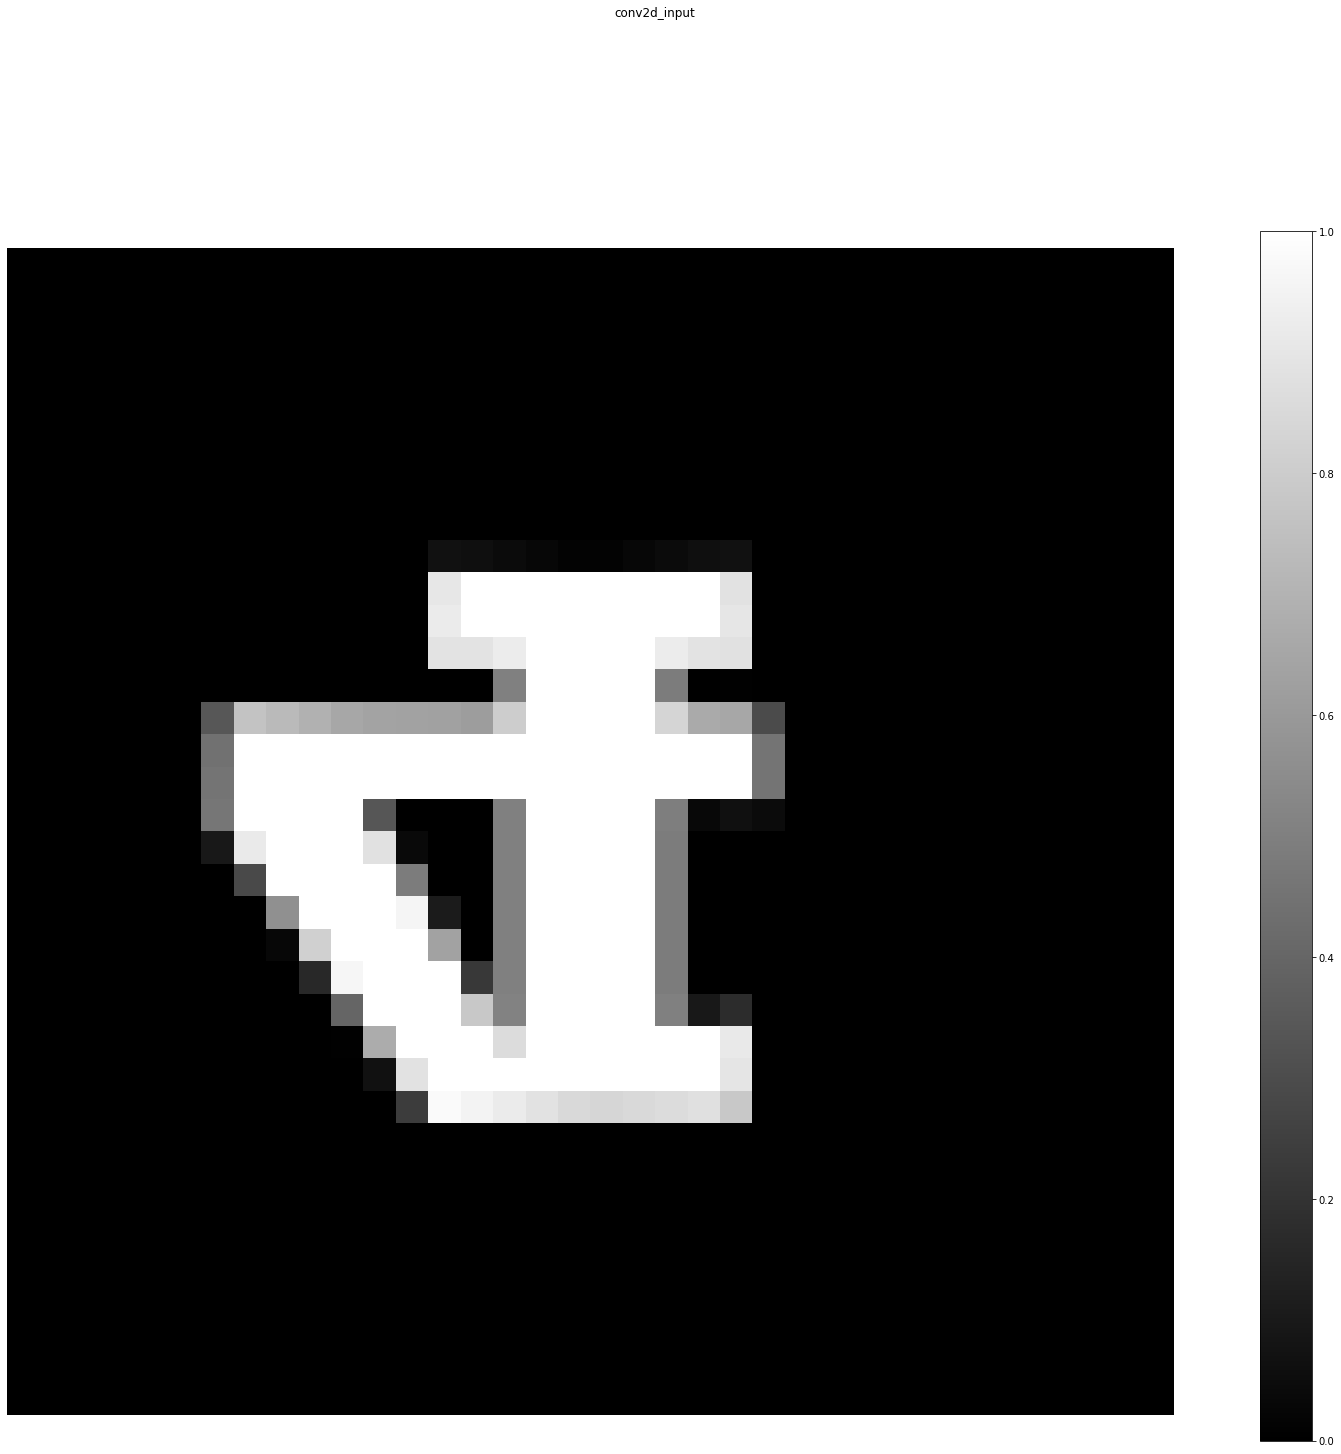

conv2d (1, 32, 32, 4) 


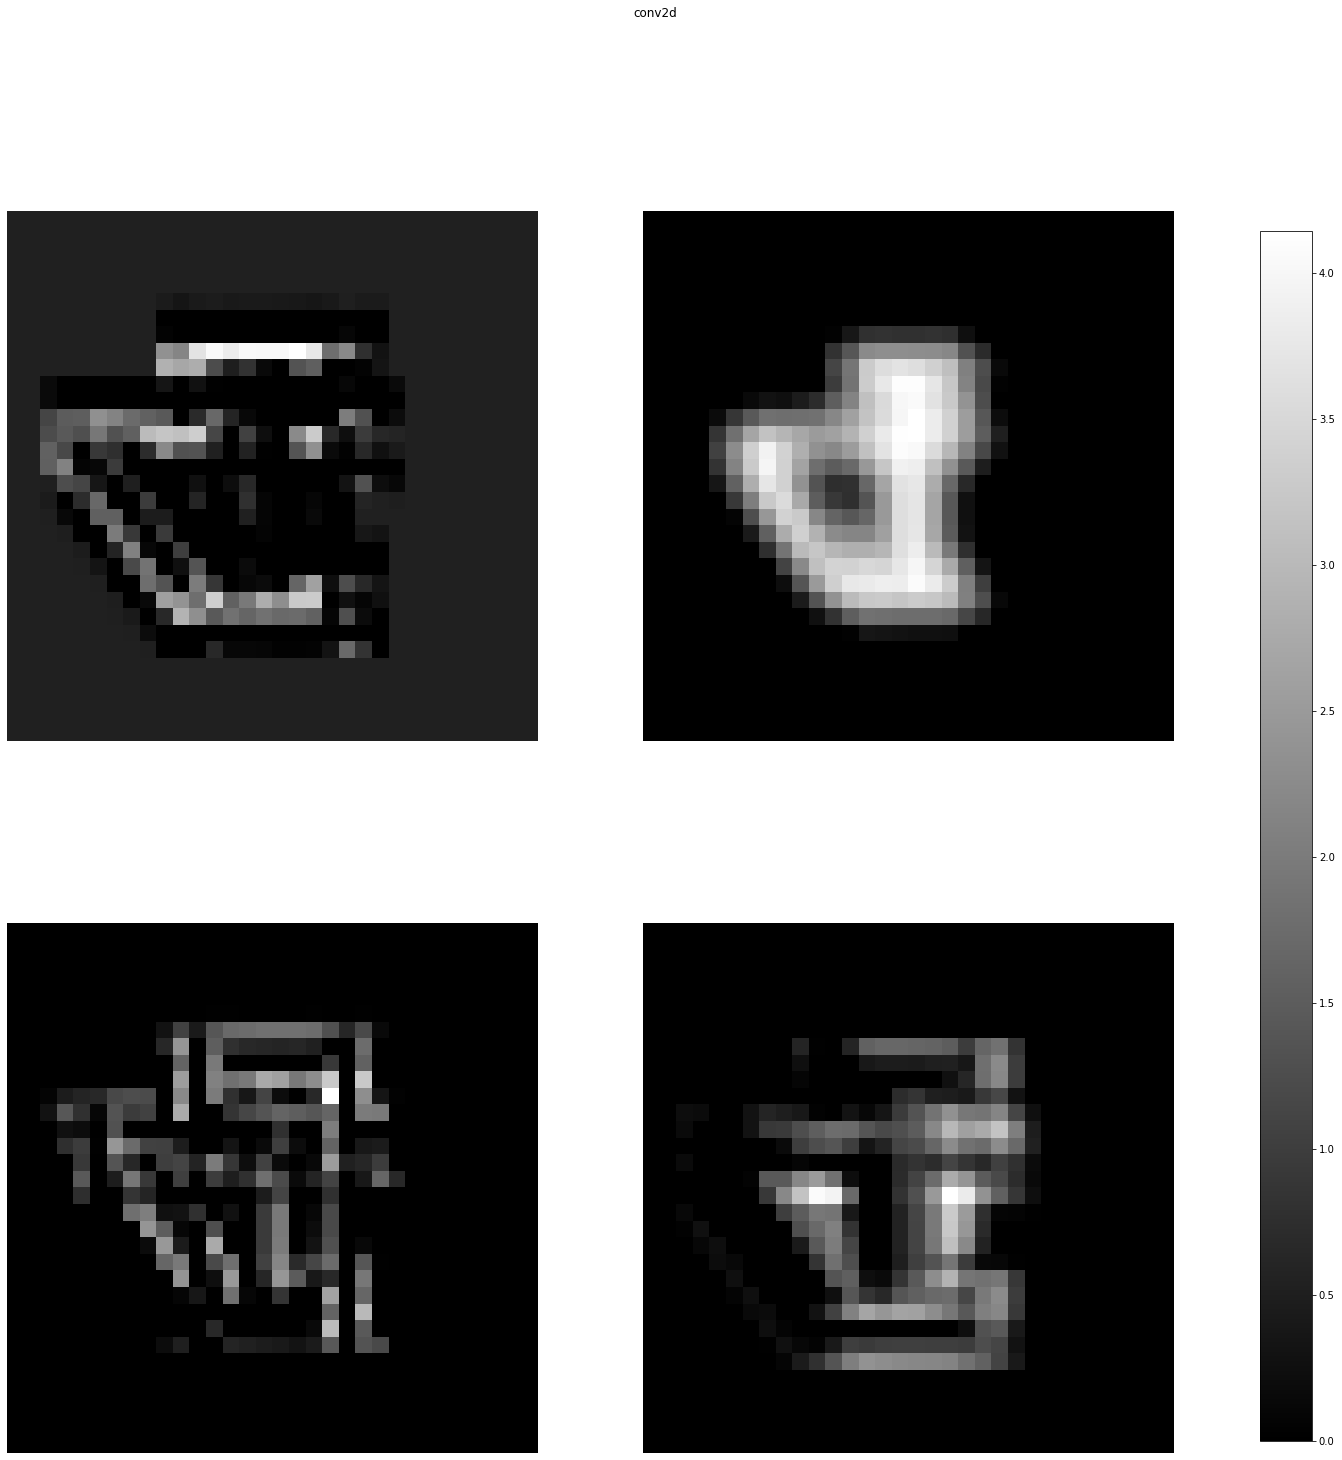

max_pooling2d (1, 16, 16, 4) 


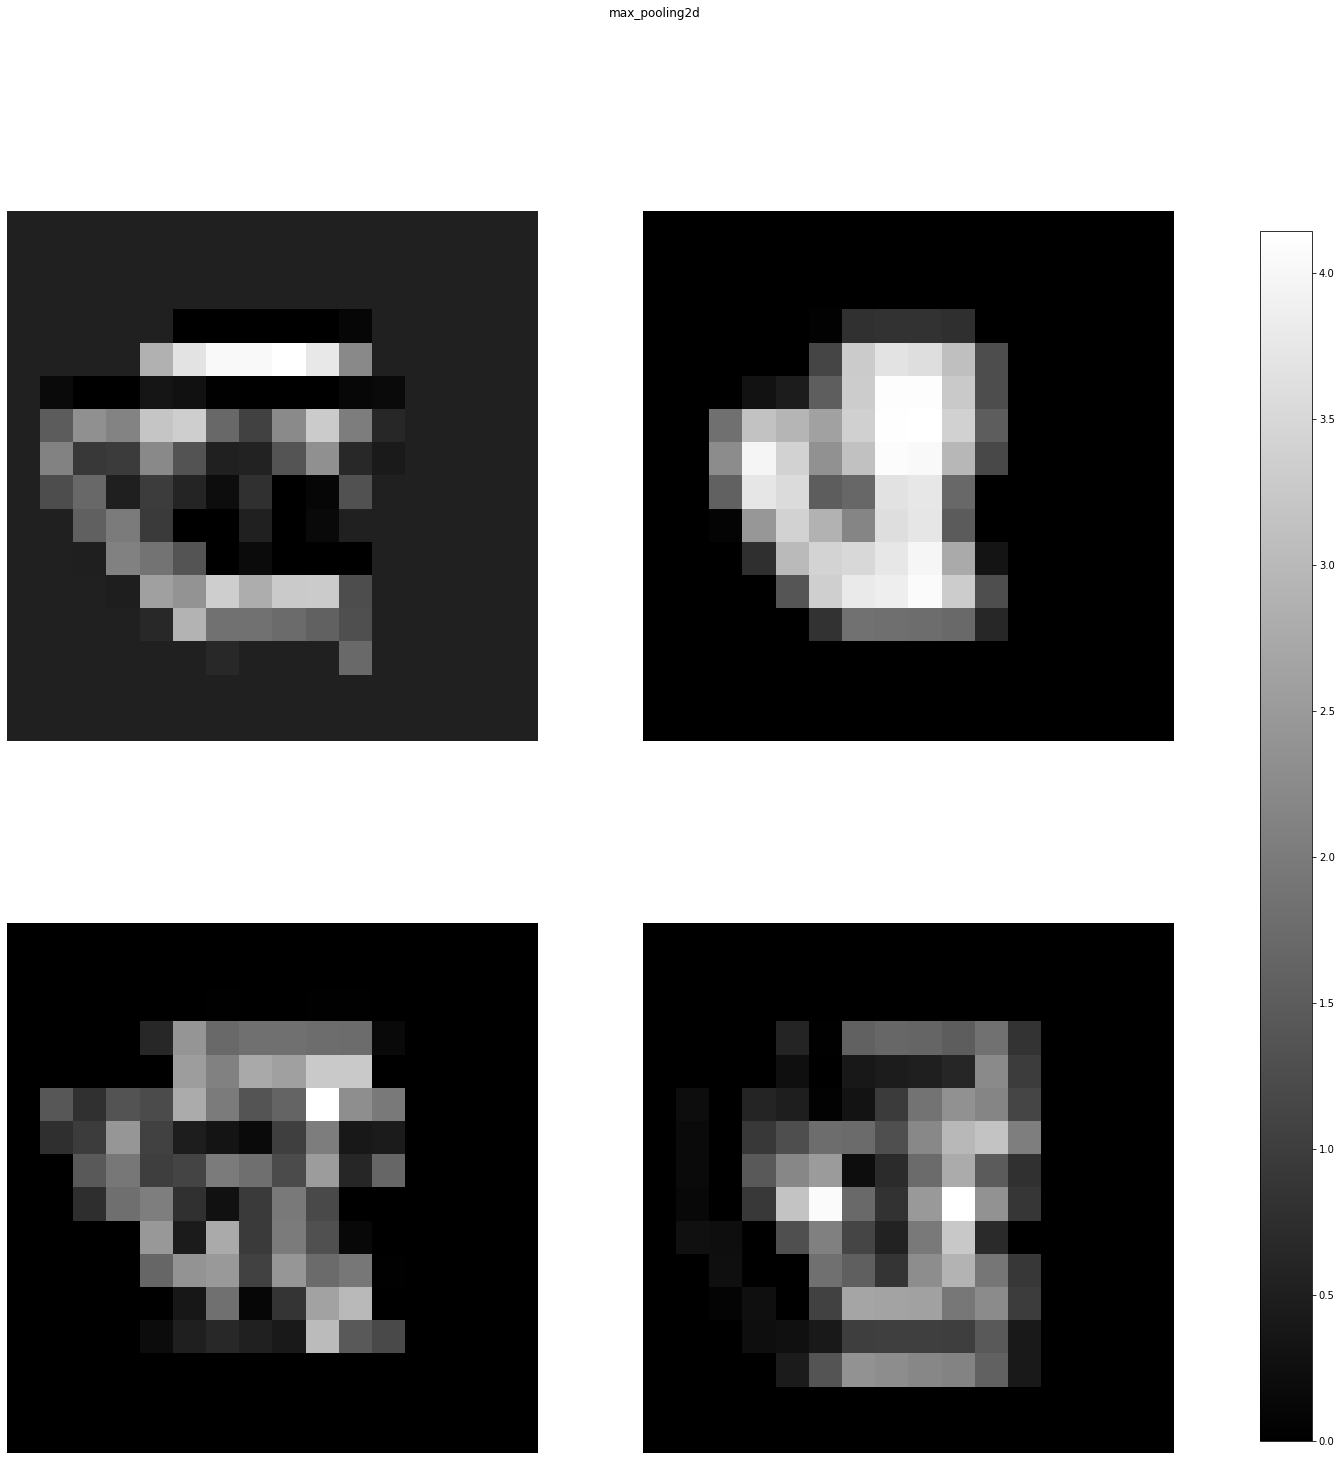

flatten (1, 1024) 


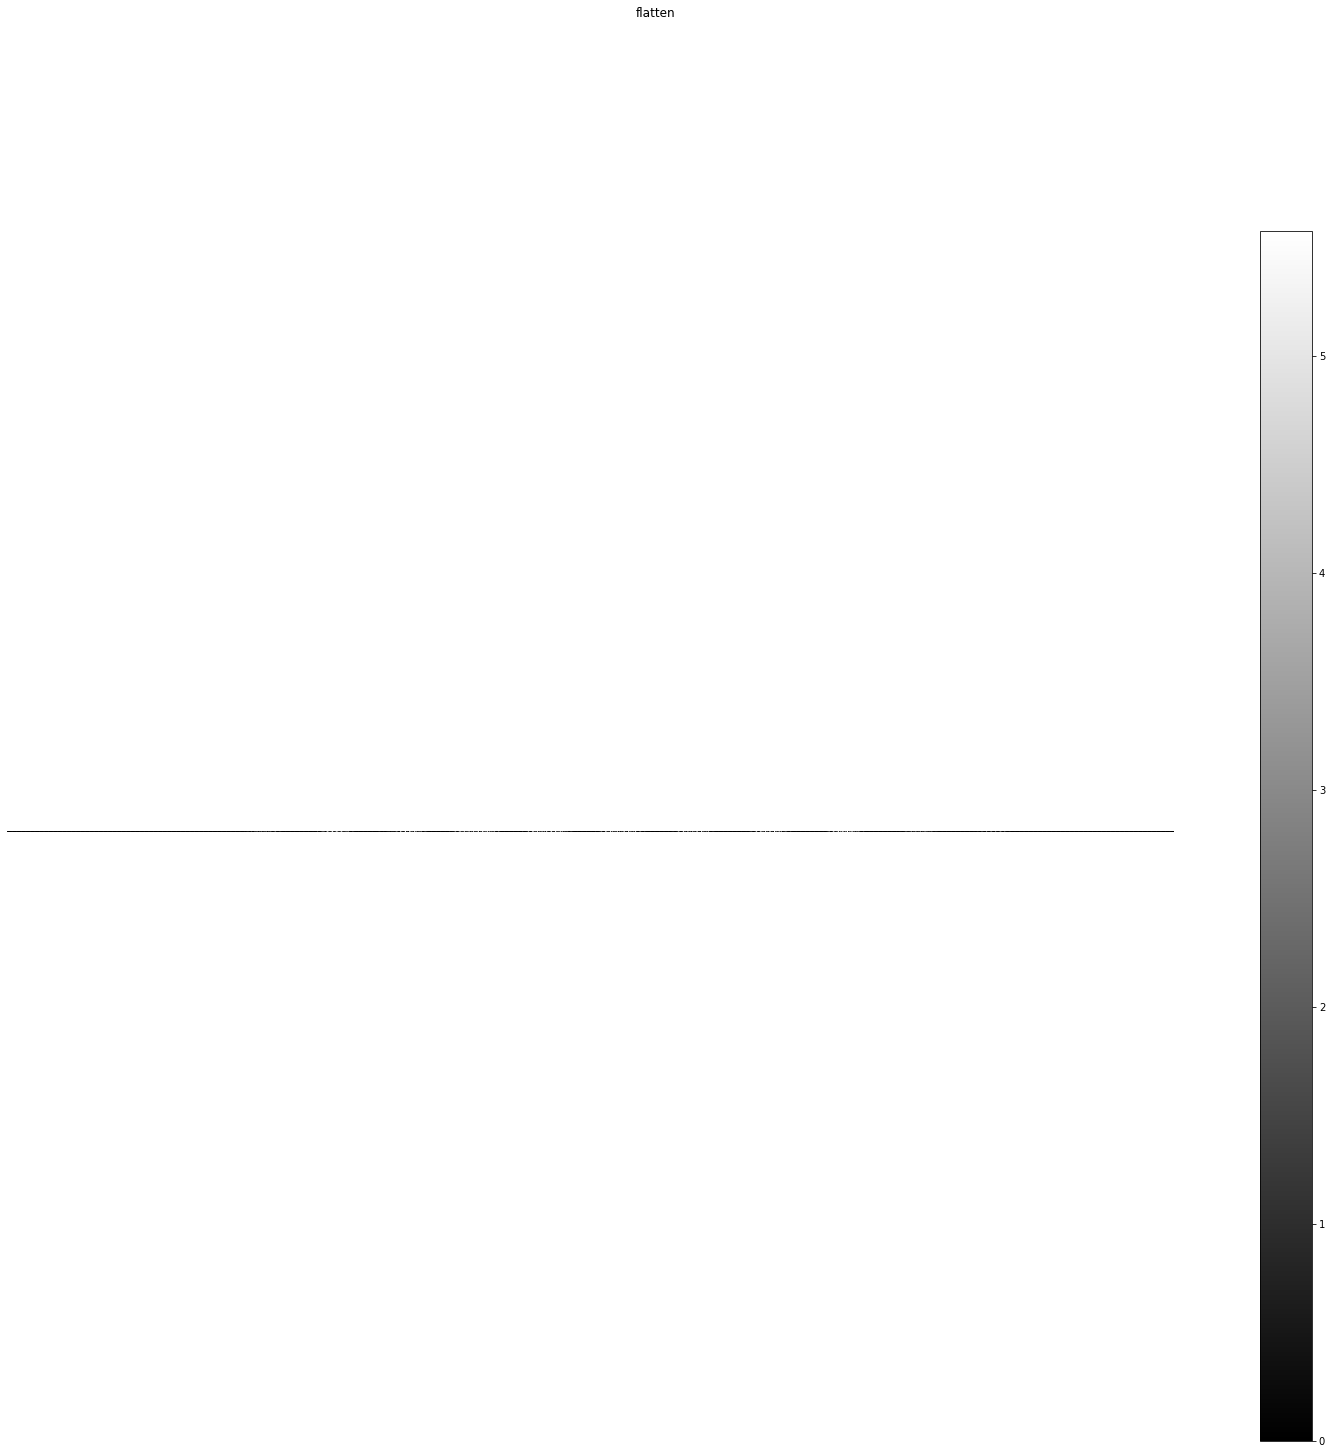

dense (1, 32) 


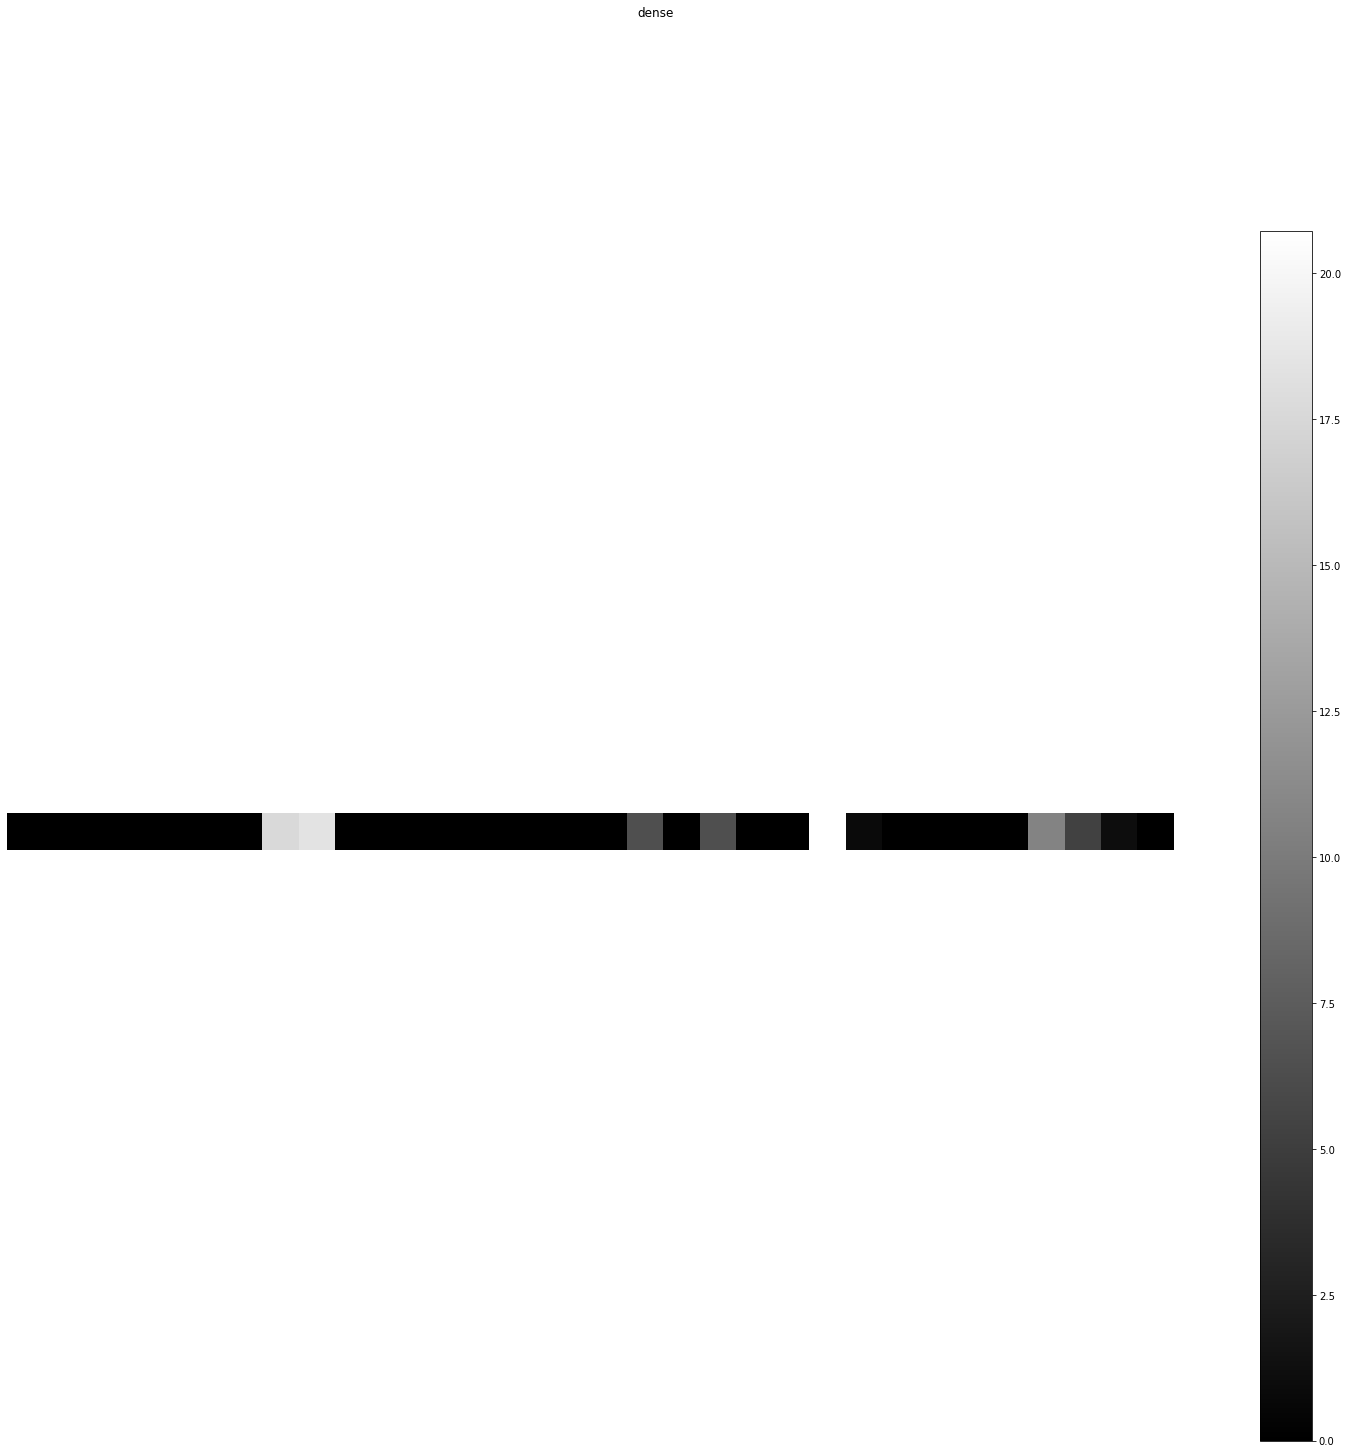

dropout (1, 32) 


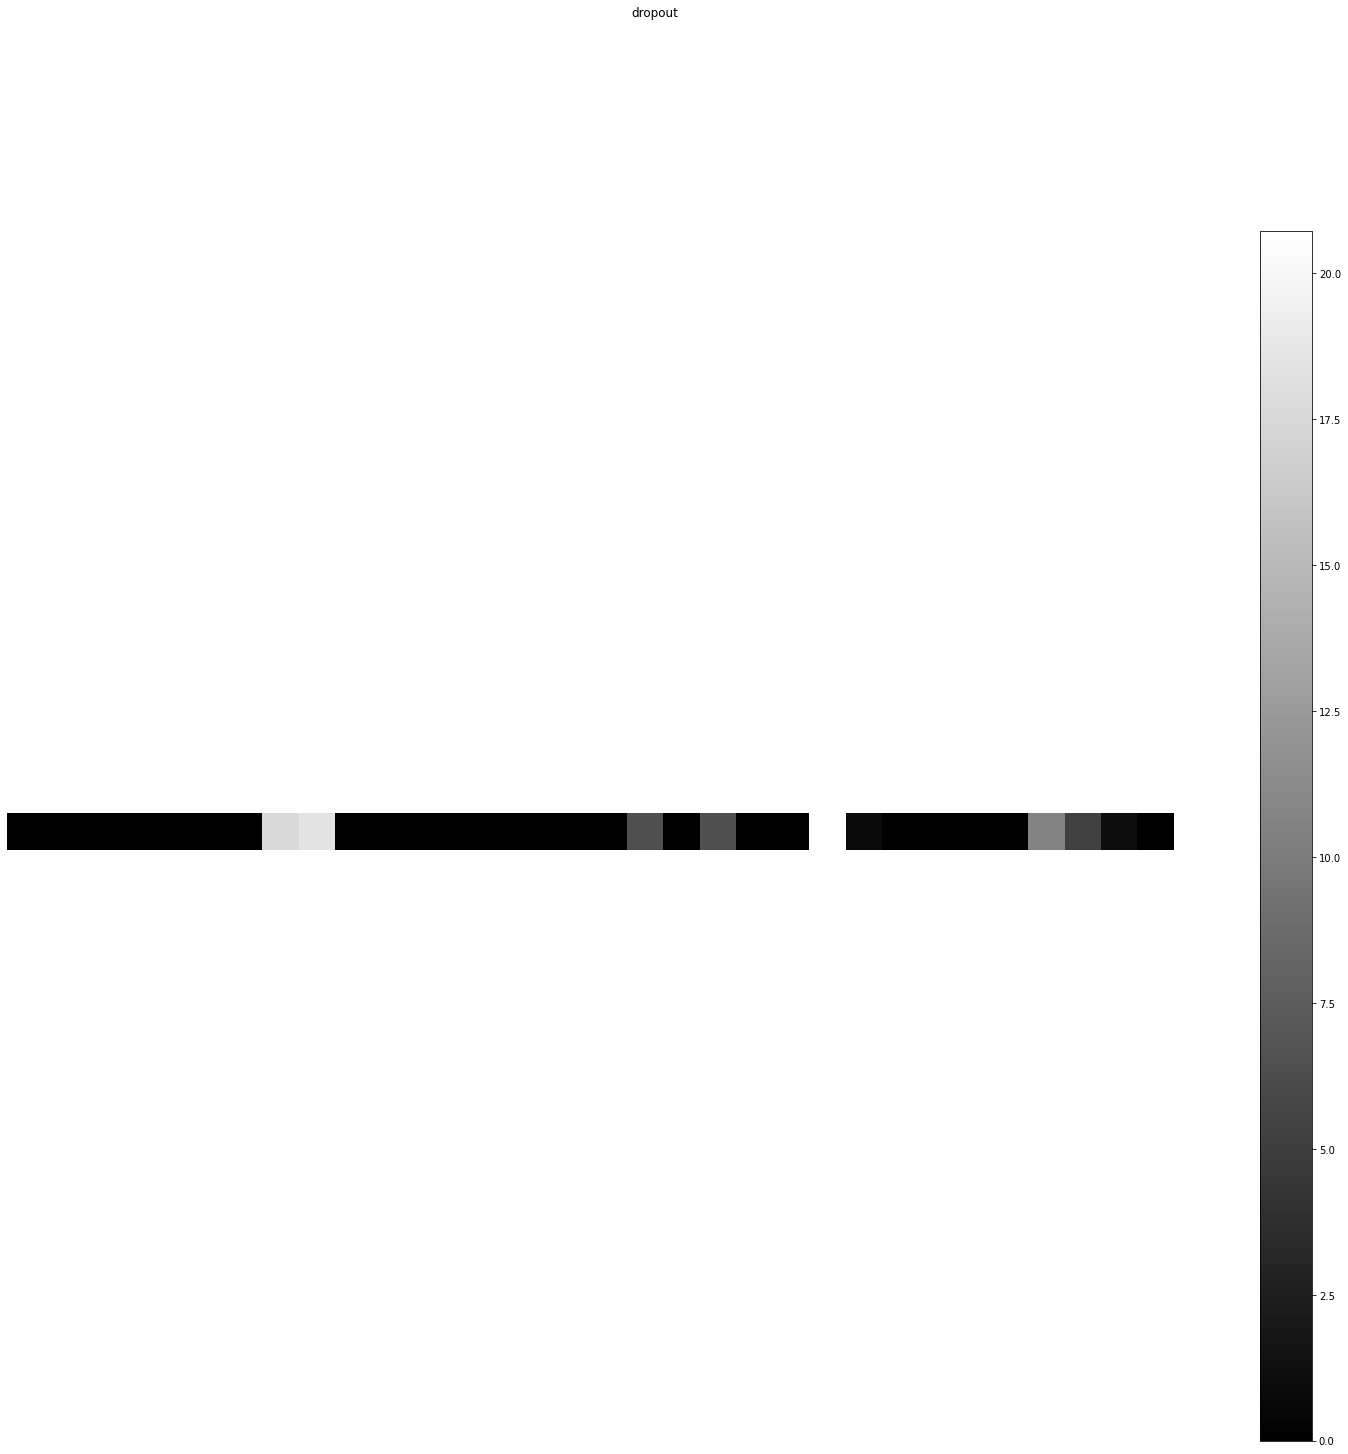

dense_1 (1, 5) 


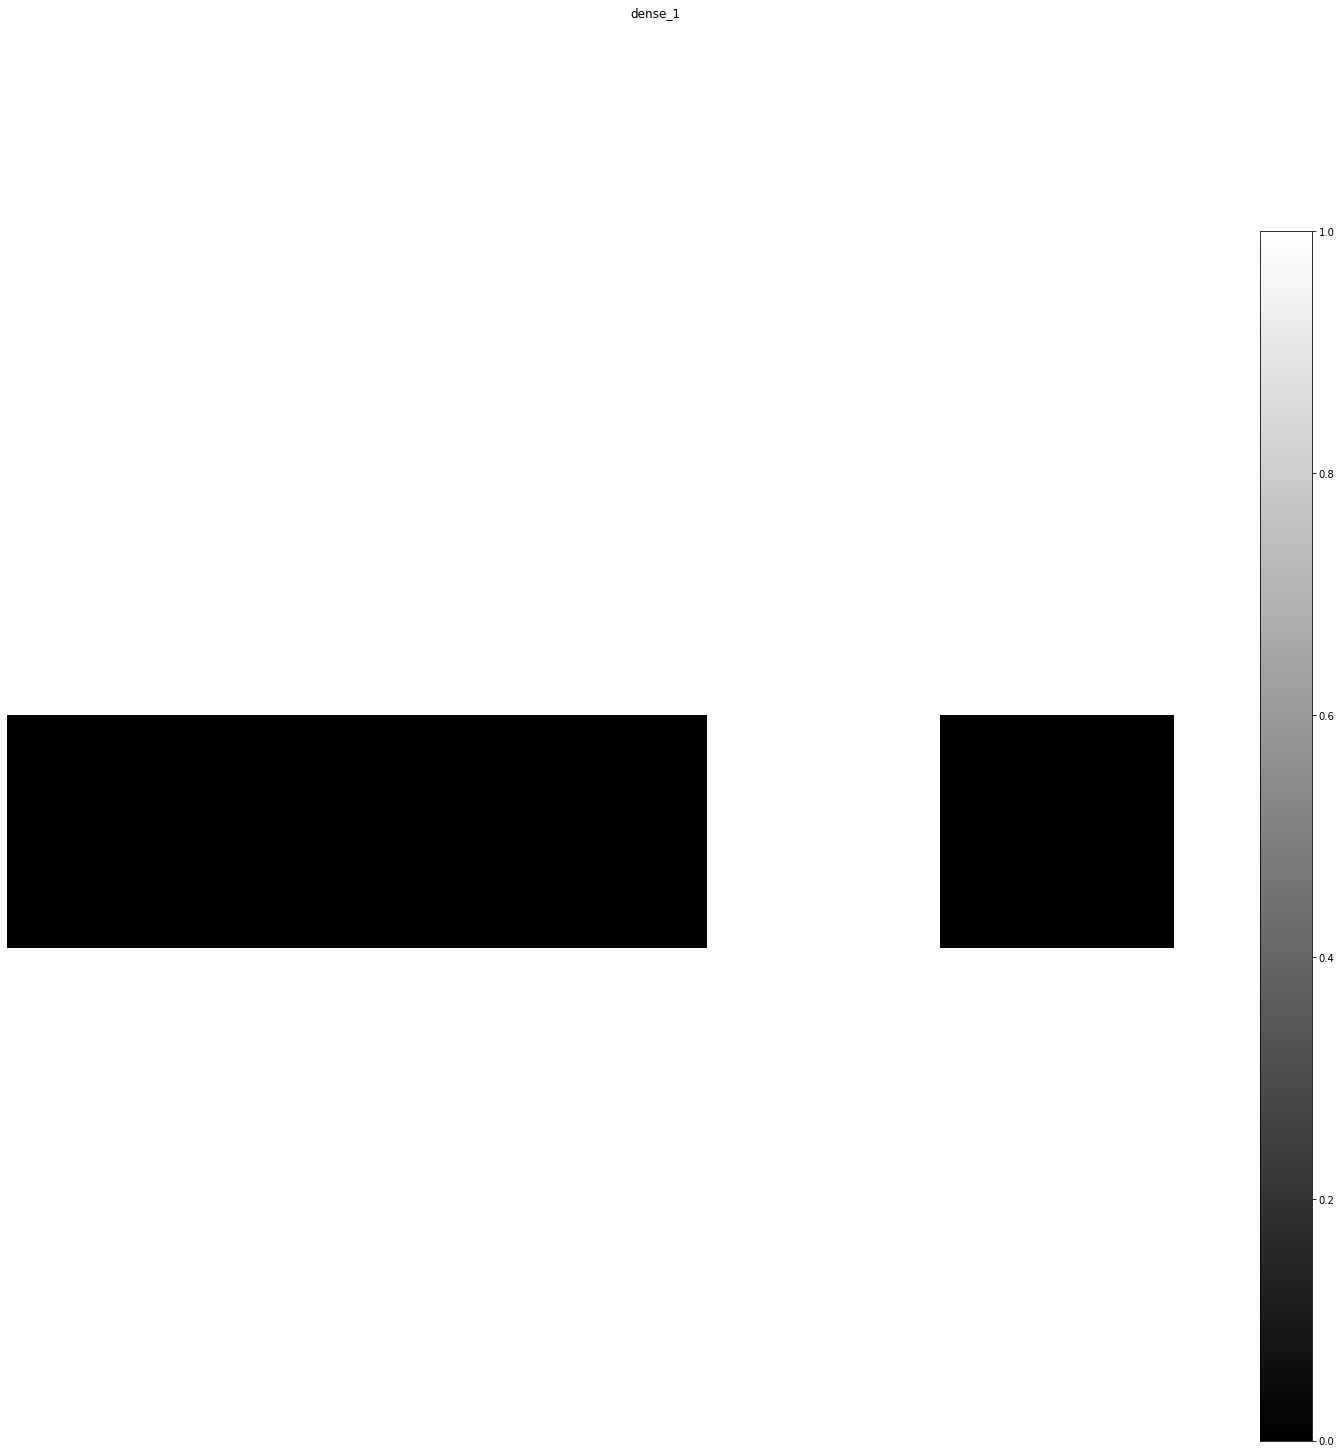

In [ ]:
# =============================================
# Keract visualizations
# =============================================
!pip install keract
from keract import get_activations, display_activations
keract_inputs = test[32:33]
keract_targets = onehot_test[32:33]
print(keract_targets)
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

# AlexNet

In [ ]:
size = (224,224)
new_train = []
new_test = []
for t in train:
  new_train.append(keras.preprocessing.image.smart_resize(t,size))
for t in test:
  new_test.append(keras.preprocessing.image.smart_resize(t,size))


In [ ]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,1),activation='relu', kernel_size=(11,11), strides=(4,4), padding='valid'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11),activation='relu', strides=(1,1), padding='valid'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3),activation='relu', strides=(1,1), padding='valid'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3),activation='relu', strides=(1,1), padding='valid'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', strides=(1,1), padding='valid'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,),activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(5,activation='softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 54, 54, 96)        11712     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 256)        

In [ ]:
new_train = np.array(new_train)
new_test = np.array(new_test)
print(new_train.shape,new_test.shape)
new_train=new_train.reshape([-1,new_train.shape[1],new_train.shape[2],1])
new_test=new_test.reshape([-1,new_test.shape[1],new_test.shape[2],1])

print('Train shape=', new_train.shape , '\nTest shape=', new_test.shape)

(2511, 224, 224, 1) (279, 224, 224, 1)
Train shape= (2511, 224, 224, 1) 
Test shape= (279, 224, 224, 1)


In [ ]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(new_train, onehot_train,
         epochs=200,
         batch_size=128,
         validation_data=(new_test, onehot_test),
         verbose=1)

Train Accuracy:  1.0
Test_Accuracy:  1.0


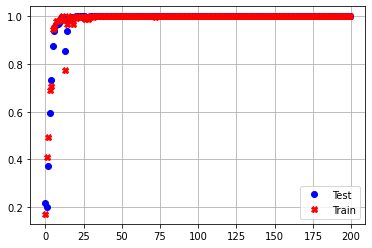

In [ ]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.grid()
plt.legend(['Train','Test'])

# ResNet50

In [ ]:
_train = np.zeros((train.shape[0],train.shape[1],train.shape[2],3))
_test = np.zeros((test.shape[0],test.shape[1],test.shape[2],3))
print('Train shape=', _train.shape , '\nTest shape=', _test.shape)
t1 = train.reshape(train.shape[0],train.shape[1],train.shape[2])
t2 = test.reshape(test.shape[0],test.shape[1],test.shape[2])
_train[:,:,:,0] = t1
_train[:,:,:,1] = t1
_train[:,:,:,2] = t1
_test[:,:,:,0] = t2
_test[:,:,:,1] = t2
_test[:,:,:,2] = t2

print('Train shape=', _train.shape , '\nTest shape=', _test.shape)
base_model = keras.applications.resnet50.ResNet50(
    include_top=False, weights=None,
    input_shape=(224,224,3))
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(5, activation= 'softmax')(x)
model = keras.Model(inputs = base_model.input, outputs = predictions)

Train shape= (2511, 36, 36, 3) 
Test shape= (279, 36, 36, 3)
Train shape= (2511, 36, 36, 3) 
Test shape= (279, 36, 36, 3)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 36, 36, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 42, 42, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 18, 18, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 18, 18, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

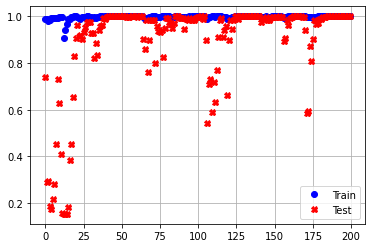

In [ ]:
print(model.summary())
# history to analyze training history evolution
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])
# validation_data allows to see evaluation on test while training
history=model.fit(_train, onehot_train,
         epochs=200,
         batch_size=128,
         validation_data=(_test, onehot_test),
         verbose=1)
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.grid()
plt.legend(['Train','Test'])